# Freehand sketch object recognition

In [ ]:
import os
import glob
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import tensorflow as tf
from PIL import Image as im
from matplotlib import pyplot
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
classes = ['cat','bicycle', 'bear','airplane',
                'ant','banana','bench','book',
                'bottlecap', 'bread']

url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'

In [ ]:
# Download the data of the aforementioned classes
for class_ in classes:
	complete_url = url+class_+".npy"
	print("Downloading : ",complete_url)
	urllib.request.urlretrieve(complete_url, "./"+class_+".npy")

In [ ]:
# Grep all the downloaded files and add them to a list
data_sets = glob.glob(os.path.join('./*.npy'))

In [ ]:
#initialize variables 
# Train data
input = np.empty([0, 784]) 
# Test data
labels = np.empty([0])	
index = 0

In [ ]:
# Concatenate the train and test data from all the files
for file in data_sets:
	data = np.load(file)
	data = data[0: 6000, :]
	input = np.concatenate((input, data), axis=0)
	labels = np.append(labels, [index]*data.shape[0])
	index += 1

In [ ]:
# K-Folds cross-validator
n_fold = 5
kf = KFold(n_splits=n_fold, shuffle=True, random_state=9)
x_train, x_test, y_train, y_test = None, None, None, None
random_ordering = np.random.permutation(input.shape[0])
input = input[random_ordering, :]
labels = labels[random_ordering]

# Divide the dataset into train and test
for train_index, test_index in kf.split(input):
    x_train, x_test = input[train_index], input[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    break

In [ ]:
len(x_train)

48000

In [ ]:
len(x_test)

12000

In [ ]:
x_train[:20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_test[:20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train[:20]

array([2., 4., 2., 4., 1., 7., 5., 9., 9., 9., 5., 7., 8., 3., 4., 2., 5.,
       8., 4., 6.])

In [ ]:
y_test[:20]

array([8., 9., 9., 6., 6., 3., 4., 6., 1., 6., 5., 4., 0., 6., 4., 0., 1.,
       8., 5., 3.])

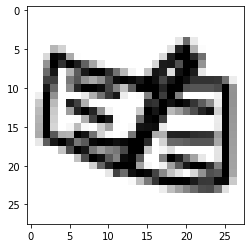

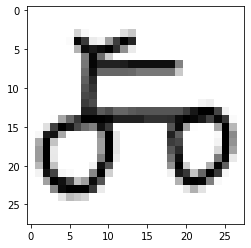

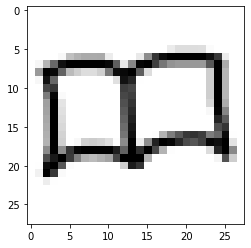

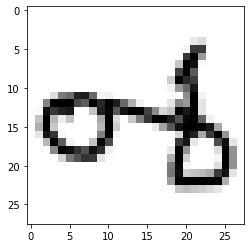

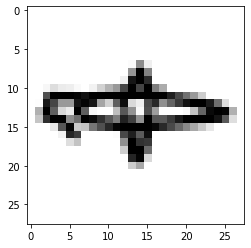

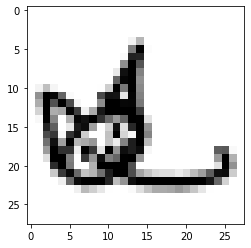

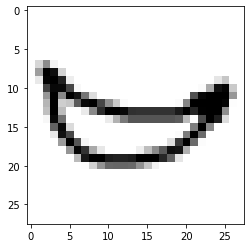

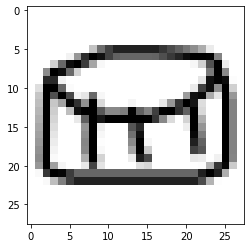

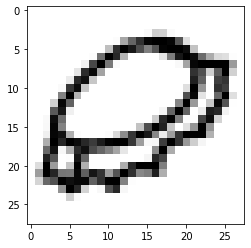

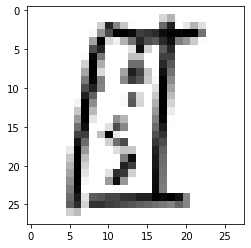

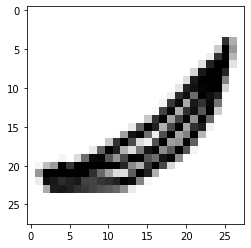

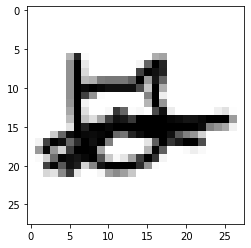

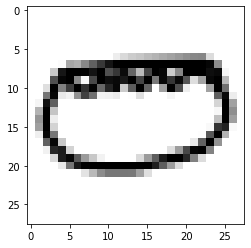

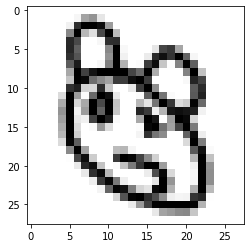

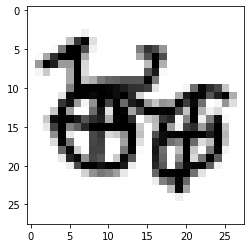

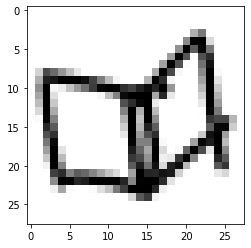

In [ ]:
import matplotlib.pyplot as plt
image_size = 28
x_train_ = x_train.reshape(x_train.shape[0], image_size, image_size)
for i in range(16):
  plt.grid(False)
  plt.imshow(x_train_[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
# Divide all the values by 255 to normalize the image
x_train /= 255.0
x_test /= 255.0

In [ ]:
# Saving for feature selection and 1d classifiers
x_train_fea = x_train
x_test_fea = x_test
x_train_1d = x_train
x_test_1d = x_test

In [ ]:
# Reshape the image size to be 28 x 28 
image_size = 28
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)

In [ ]:
num_classes = len(classes)

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.forest import RandomForestClassifier
parameters = {'n_estimators': [100,120,140,160]}

clf_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, random_state=0)
# model = GridSearchCV(clf_rf, parameters, n_jobs=-1)
clf_rf.fit(x_train_1d, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf_rf.predict(x_test_1d)
y_pred[:10]

array([3., 1., 2., 2., 3., 7., 5., 5., 1., 7.])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7693333333333333


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
# knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn.fit(x_train_1d, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test_1d)
y_pred[:10]

array([7., 1., 2., 2., 3., 3., 5., 5., 1., 7.])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.73375


# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)],
                    'alpha' : list(10.0 ** -np.arange(1, 7))}

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0)
# mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp.fit(x_train_1d, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp.predict(x_test_1d)
y_pred[:10]

array([6., 1., 2., 2., 7., 7., 7., 5., 1., 2.])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7591666666666667


# CNN

In [ ]:
# CNN Model
model = keras.Sequential()
model.add(layers.Convolution2D(64, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) 
optimizer = tf.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Fit a model to the train data
model.fit(x = x_train, y = y_train, batch_size = 100,  validation_split = 0.2, epochs=5)

Epoch 1/5
384/384 [==============================] - 49s 128ms/step - loss: 1.3954 - accuracy: 0.5126 - val_loss: 0.5900 - val_accuracy: 0.8139
Epoch 2/5
384/384 [==============================] - 49s 127ms/step - loss: 0.5519 - accuracy: 0.8276 - val_loss: 0.4879 - val_accuracy: 0.8457
Epoch 3/5
384/384 [==============================] - 48s 126ms/step - loss: 0.4246 - accuracy: 0.8669 - val_loss: 0.4172 - val_accuracy: 0.8707
Epoch 4/5
384/384 [==============================] - 49s 127ms/step - loss: 0.3585 - accuracy: 0.8900 - val_loss: 0.3657 - val_accuracy: 0.8857
Epoch 5/5
384/384 [==============================] - 49s 127ms/step - loss: 0.3101 - accuracy: 0.9028 - val_loss: 0.3990 - val_accuracy: 0.8717


In [ ]:
y_predict = model.predict(x_test)
y_predict[:2]

array([[5.7331502e-02, 1.0770162e-02, 7.3117194e-06, 1.7955775e-03,
        8.3522132e-04, 2.6992700e-04, 8.5929477e-01, 6.8815485e-02,
        1.5917904e-04, 7.2092854e-04],
       [2.0305703e-04, 9.8652655e-01, 1.8722964e-04, 5.0187679e-03,
        2.3325518e-04, 1.3398538e-04, 4.5185752e-04, 6.9455239e-03,
        2.0934637e-04, 9.0538939e-05]], dtype=float32)

In [ ]:
# Obtain the accuracy of the above model on the test data
accuracy = model.evaluate(x_test, y_test)

375/375 [==============================] - 6s 14ms/step - loss: 0.4127 - accuracy: 0.8717


# Feature Selection

In [ ]:
# Taking old data inputs
x_train = x_train_fea 
x_test = x_test_fea

In [ ]:
x_train_1d = x_train_fea
x_test_1d = x_test_fea

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
n_features = 400
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x_train_1d, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(range(len(x_train_1d)))
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(n_features,'Score'))  #print 1 best features

     Specs        Score
529    529  5518.501042
501    501  5166.244246
506    506  4995.405104
557    557  4758.476807
478    478  4463.708750
..     ...          ...
423    423  1432.081864
212    212  1427.521826
61      61  1425.831740
317    317  1423.286824
356    356  1422.609461

[400 rows x 2 columns]


In [ ]:
fit.scores_[100:120]

array([2817.03491109, 2788.9838479 , 2684.54483605, 2603.29612546,
       2573.31732163, 2676.37882182, 2481.86204225, 2088.58432816,
       1491.61948824,  810.22297716,  153.80054002,           nan,
                 nan,  204.42654187, 1109.29052238, 1950.91974846,
       2535.61369022, 2766.7258332 , 2753.20347469, 2578.22331989])

In [ ]:
featureScores.nlargest(n_features,'Score')

,Specs,Score
529,529,5518.501042
501,501,5166.244246
506,506,4995.405104
557,557,4758.476807
478,478,4463.708750
...,...,...
423,423,1432.081864
212,212,1427.521826
61,61,1425.831740
317,317,1423.286824


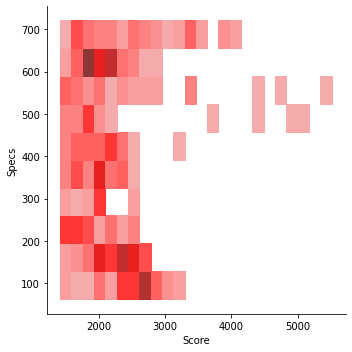

In [ ]:
sns.displot(data=featureScores.nlargest(n_features,'Score'), x="Score", y="Specs", color="Red")

In [ ]:
train_x_new = []
for x_tr in x_train_1d:
  temp = []
  for i in featureScores.nlargest(n_features, 'Score')['Specs']:
      temp.append(x_tr[i])
  train_x_new.append(temp)

In [ ]:
train_x_new[0][115:120]

[0.28627450980392155, 1.0, 0.0, 0.9058823529411765, 0.0]

In [ ]:
test_x_new = []
for x_te in x_test_1d:
  temp = []
  for i in featureScores.nlargest(n_features, 'Score')['Specs']:
      temp.append(x_te[i])
  test_x_new.append(temp)

In [ ]:
test_x_new[0][:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
len(train_x_new)

48000

In [ ]:
len(test_x_new)

12000

# Updating the dataset with new features

In [ ]:
x_train = np.array(train_x_new)
x_test = np.array(test_x_new)

In [ ]:
x_train_1d = x_train
x_test_1d = x_test

In [ ]:
# Reshape the image size to be 20 x 20 
image_size = 20
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.forest import RandomForestClassifier
parameters = {'n_estimators': [100,120,140,160]}

clf_rf_fe = RandomForestClassifier(n_estimators = 280, n_jobs=-1, random_state=0)
# clf_rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
clf_rf_fe.fit(x_train_1d, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf_rf_fe.predict(x_test_1d)
y_pred[:10]

array([8., 9., 9., 6., 6., 3., 4., 6., 1., 6.])

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.788


# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

knn_fe = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
# knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn_fe.fit(x_train_1d, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
y_pred = knn_fe.predict(x_test_1d)
y_pred[:10]

array([8., 9., 9., 6., 6., 3., 4., 6., 1., 6.])

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7076666666666667


# MLP

In [70]:
from sklearn.neural_network import MLPClassifier

tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)],
                    'alpha' : list(10.0 ** -np.arange(1, 7))}

mlp_fe = MLPClassifier(hidden_layer_sizes=(784,784), random_state=0)
# mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp_fe.fit(x_train_1d, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784, 784), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [71]:
y_pred = mlp_fe.predict(x_test_1d)
y_pred[:10]

array([8., 9., 9., 9., 6., 3., 4., 6., 1., 6.])

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.788


# CNN

In [82]:
# Reshaping
image_size = 28
x_train = x_train_fea.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test_fea.reshape(x_test.shape[0], image_size, image_size, 1)

In [83]:
# CNN Model
model_fe = keras.Sequential()
model_fe.add(layers.Convolution2D(64, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size=(3, 3)))
model_fe.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size=(3, 3)))
model_fe.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size =(3,3)))
model_fe.add(layers.Flatten())
model_fe.add(layers.Dense(128, activation='relu'))
model_fe.add(layers.Dense(len(classes), activation='softmax')) 
optimizer = tf.optimizers.Adam()
model_fe.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [85]:
# Fit a model to the train data
model_fe.fit(x = x_train, y = y_train, batch_size = 100,  validation_split = 0.2, epochs=15)

Epoch 1/15
384/384 [==============================] - 47s 122ms/step - loss: 0.7359 - accuracy: 0.7664 - val_loss: 0.5460 - val_accuracy: 0.8343
Epoch 2/15
384/384 [==============================] - 47s 123ms/step - loss: 0.4823 - accuracy: 0.8491 - val_loss: 0.4739 - val_accuracy: 0.8502
Epoch 3/15
384/384 [==============================] - 47s 123ms/step - loss: 0.3919 - accuracy: 0.8784 - val_loss: 0.3873 - val_accuracy: 0.8830
Epoch 4/15
384/384 [==============================] - 47s 122ms/step - loss: 0.3417 - accuracy: 0.8928 - val_loss: 0.3646 - val_accuracy: 0.8901
Epoch 5/15
384/384 [==============================] - 47s 122ms/step - loss: 0.2953 - accuracy: 0.9070 - val_loss: 0.3593 - val_accuracy: 0.8886
Epoch 6/15
384/384 [==============================] - 47s 122ms/step - loss: 0.2644 - accuracy: 0.9157 - val_loss: 0.3322 - val_accuracy: 0.8989
Epoch 7/15
384/384 [==============================] - 47s 122ms/step - loss: 0.2372 - accuracy: 0.9252 - val_loss: 0.3148 - val_ac

In [86]:
y_pred = model_fe.predict(x_test)
y_pred[:2]

array([[8.0273094e-11, 3.5359790e-16, 2.1405140e-06, 1.5757057e-07,
        7.0417237e-14, 1.8883543e-15, 5.8531192e-12, 3.6040872e-14,
        9.9999774e-01, 1.1223305e-08],
       [1.5369899e-06, 8.2290478e-07, 1.8412165e-05, 5.8398962e-01,
        1.3089204e-09, 2.2239140e-08, 9.7403836e-06, 4.9439736e-06,
        5.5842195e-03, 4.1039068e-01]], dtype=float32)

In [87]:
# Obtain the accuracy of the above model on the test data
accuracy = model_fe.evaluate(x_test, y_test)

375/375 [==============================] - 5s 14ms/step - loss: 0.4575 - accuracy: 0.8934


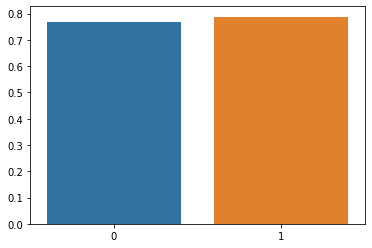

In [98]:
df = pd.DataFrame([[0.769, 0.788]])
ax = sns.barplot(data=df, ci="sd")

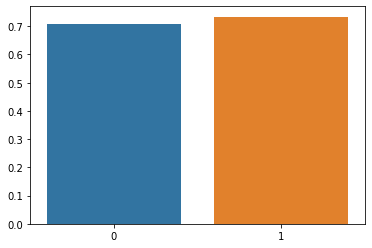

In [99]:
df = pd.DataFrame([[0.707, 0.73375]])
ax = sns.barplot(data=df, ci="sd")

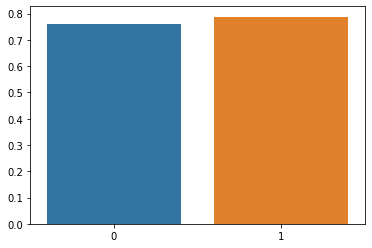

In [100]:
df = pd.DataFrame([[0.759, 0.788]])
ax = sns.barplot(data=df, ci="sd")

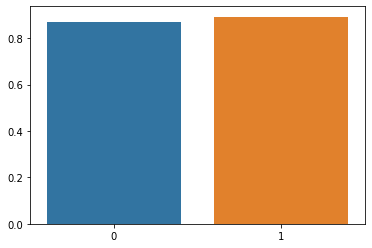

In [101]:
df = pd.DataFrame([[0.8717, 0.8924]])
ax = sns.barplot(data=df, ci="sd")